In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

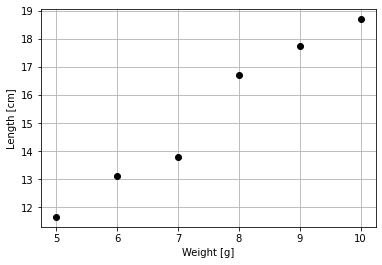

In [2]:
# 용수철 실험을 통한 데이터

input_x = np.array([5, 6, 7, 8, 9, 10])
output_y = np.array([11.66, 13.10, 13.79, 16.71, 17.74, 18.70])

plt.plot(input_x, output_y, 'ko')
plt.xlabel("Weight [g]")
plt.ylabel("Length [cm]")
plt.grid()

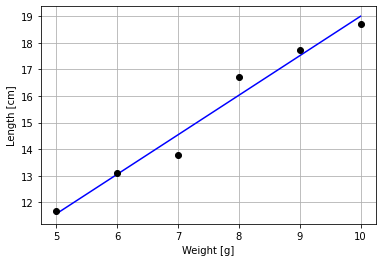

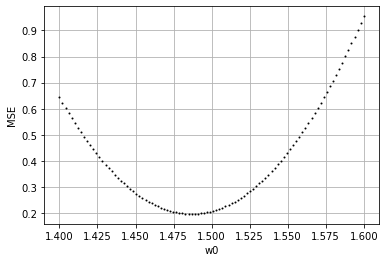

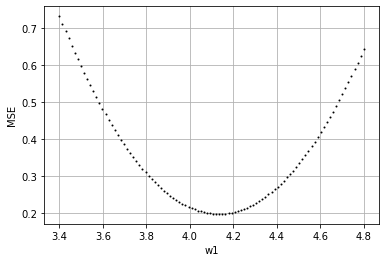

In [3]:
# 최적 선형회귀 모델 - 해석해를 통한 매개변수 최적화 p.22

#w0_ans, w1_ans = 1.4875, 4.1274
w0, w1 = 1, 2

#                              분자                                          /       분모
w0 = (sum(output_y*(input_x - (sum(input_x)/len(input_x)))) / len(input_x))  /  (
    sum(input_x**2)/len(input_x) - (sum(input_x)/len(input_x))**2 )

w1 = (sum(output_y-w0*input_x))    /    len(input_x)

#y_hat_ans = w0_ans*input_x + w1_ans
y_hat = w0*input_x + w1

# Linear regression
plt.figure(1)
#plt.plot(input_x, y_hat_ans, 'r')
plt.plot(input_x, y_hat, 'b')
plt.plot(input_x, output_y, 'ko')
plt.xlabel("Weight [g]")
plt.ylabel("Length [cm]")
plt.grid()

# MSE / Mean Square error         매개변수 값의 변화에 따른 MSE 측정

# W0
ww0 = np.linspace(1.4, 1.6,100)   

plt.figure(2)
for i in ww0:
    y_hat2 = i*input_x + w1
    mse = sum((output_y - y_hat2)**2) / len(output_y)
    plt.plot(i, mse, 'ok', markersize = '1')
plt.xlabel("w0")
plt.ylabel("MSE")
plt.grid()


# W1
ww1 = np.linspace(3.4,4.8,100)    
plt.figure(3)

for i in ww1:
    y_hat2 = w0*input_x + i
    mse = sum((output_y - y_hat2)**2) / len(output_y)
    plt.plot(i, mse, 'ok', markersize = '1')
plt.xlabel("w1")
plt.ylabel("MSE")
plt.grid()

Text(0.5, 0, 'age')

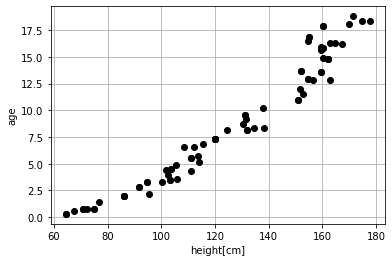

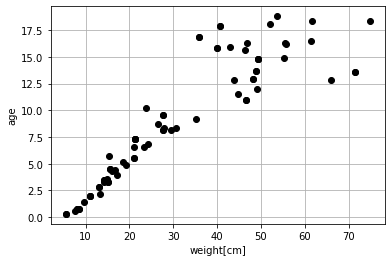

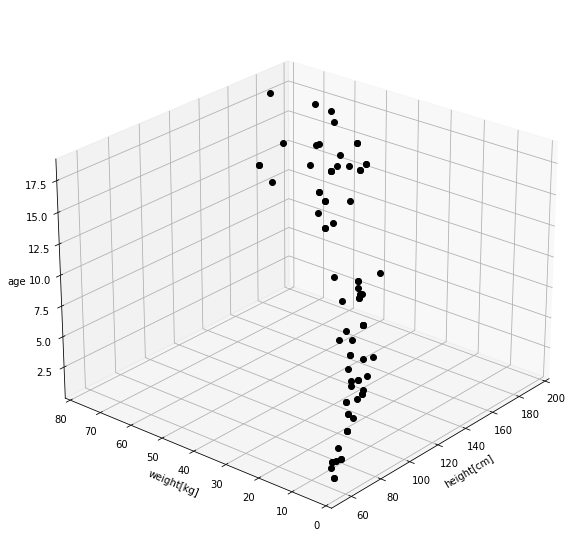

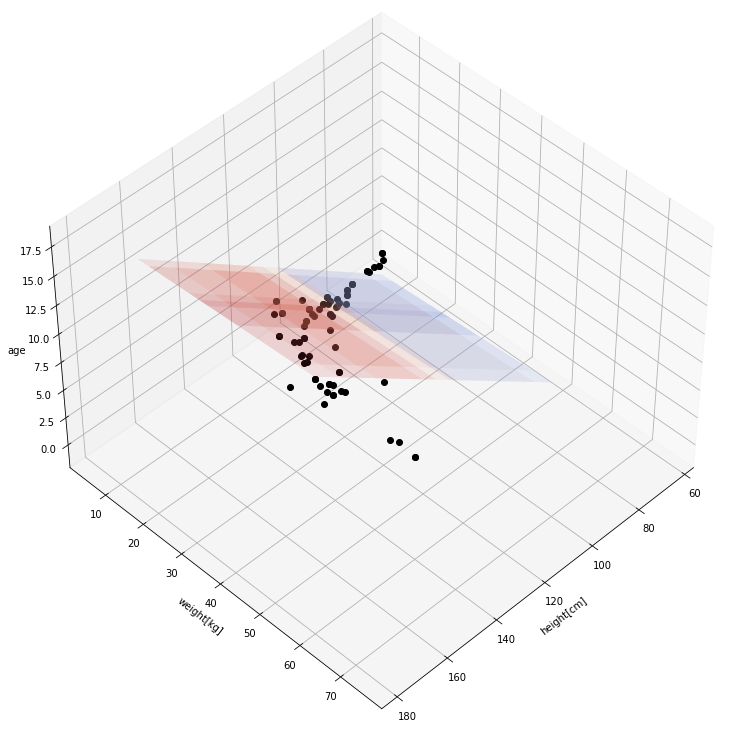

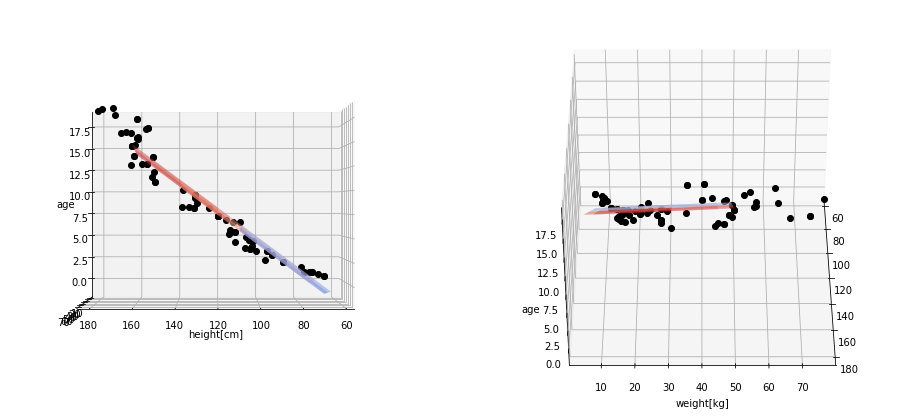

In [4]:
# 다항 선형회귀 - chap2

df = pd.read_excel ('C:/Users/jigeon/Winter_Lab_study/Linear_regression_data1.xlsx')

dataSet = []
for i in range(3,83):
    dataSet.append(np.array(df.loc[i, ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']])) # 3~ 82

X = []  # input Data
Y = []  # Output Data
w = []  # whights

for i in dataSet:                                            # input output data 정렬
    j = np.append(i[1:3], np.array([1])) # bias 1값 추가
    X.append(j)
    Y.append(i[3])
    #print(j)
    #print(i[3])

k = np.linalg.inv(np.array(np.transpose(X)@np.array(X), dtype=np.float)) # dtype=np.float 해주지 않으면 오류 발생
w = k@np.transpose(X)@Y # w = (X^T X)^-1 X^T Y
#print(w) # 최적 매개변수 계산 값

# ----------------------------------- 그래프 출력 ---------------------------------------------


# 높이에 따른 나이 그래프
plt.figure(1)
height = []
for i in X:
    height.append(i[0])
plt.plot(height, Y, 'ok')
plt.xlabel('height[cm]')
plt.ylabel('age')
plt.grid()


# 체중에 따른 나이 그래프
plt.figure(2)
weight = []
for i in X:
    weight.append(i[1])
plt.plot(weight, Y, 'ok')
plt.xlabel('weight[cm]')
plt.ylabel('age')
plt.grid()


# 나이와 체중에 따른 나이 그래프
plt.figure(3,figsize=(10,10))
ax = plt.subplot(111,projection='3d')
ax.plot(height,weight,Y, 'ok')
ax.view_init(25,40)
ax.set_xlim(200,50)
ax.set_ylim(80,0)
ax.set_xlabel('height[cm]')
ax.set_ylabel('weight[kg]')
ax.set_zlabel('age')


# 3차원 다항선형 모델
xx,yy = np.meshgrid(height,weight)
YY = (w[0]*xx)+(w[1]*yy)+w[2]

plt.figure(4,figsize=(13,13))
ax = plt.subplot(111,projection='3d')
ax.plot(height,weight,Y, 'ok')
ax.plot_surface(xx,yy,YY, rstride=10, cstride=10, alpha=0.03, cmap=cm.coolwarm)
ax.view_init(45,45)
ax.set_xlabel('height[cm]')
ax.set_ylabel('weight[kg]')
ax.set_zlabel('age')


# 여러각도에서 볼 수 있도록 추가 그래프
plt.figure(5,figsize=(16,16))
ax2 = plt.subplot(121,projection='3d')
ax2.plot(height,weight,Y, 'ok')
ax2.plot_surface(xx,yy,YY, rstride=10, cstride=10, alpha=0.1, cmap=cm.coolwarm)
ax2.view_init(0,90)
ax2.set_xlabel('height[cm]')
ax2.set_zlabel('age')
ax3 = plt.subplot(122,projection='3d')
ax3.plot(height,weight,Y, 'ok')
ax3.plot_surface(xx,yy,YY, rstride=10, cstride=10, alpha=0.1, cmap=cm.coolwarm)
ax3.view_init(38,0)
ax3.set_ylabel('weight[kg]')
ax3.set_zlabel('age')

In [5]:
for i in dataSet: # 엑셀에 저장되어있는 데이터 셋             INDEX / input_X1 / input_X2 / output_Y
    print(i)

[1 152.6 44.7 11.5]
[2 160.4 39.9 15.8]
[3 112.2 21.1 6.6]
[4 159.3 46.4 15.6]
[5 150.9 46.6 11]
[6 91.7 13.1 2.8]
[7 74.8 8 0.8]
[8 111.1 16.1 4.3]
[9 162.9 43.8 12.8]
[10 131.3 27.6 9.6]
[11 105.3 19.2 4.9]
[12 177.8 61.7 18.4]
[13 101.8 16.8 4.4]
[14 151.5 49 12]
[15 86.2 11 2]
[16 137.8 23.7 10.2]
[17 160.1 40.6 17.9]
[18 119.9 21.2 7.3]
[19 156.4 65.9 12.8]
[20 154.7 48.1 12.9]
[21 64.4 5.5 0.3]
[22 67.5 7.7 0.6]
[23 70.7 8.6 0.8]
[24 162.1 49.4 14.8]
[25 167.3 55.6 16.2]
[26 155 35.8 16.9]
[27 70.7 8.6 0.8]
[28 74.8 8 0.8]
[29 130.5 26.5 8.7]
[30 91.7 13.1 2.8]
[31 108.6 23.4 6.6]
[32 160.1 40.6 17.9]
[33 94.7 15.1 3.3]
[34 95.3 13.2 2.2]
[35 162.7 46.9 16.3]
[36 131.6 35.1 9.2]
[37 154.7 61.4 16.5]
[38 64.4 5.5 0.3]
[39 159.6 71.5 13.6]
[40 115.6 24.2 6.8]
[41 72.2 8.3 0.8]
[42 124.6 29.4 8.2]
[43 134.5 27.8 8.3]
[44 171.3 53.6 18.8]
[45 162.1 49.4 14.8]
[46 155 35.8 16.9]
[47 76.7 9.7 1.4]
[48 159.6 71.5 13.6]
[49 150.9 46.6 11]
[50 159.4 42.9 15.9]
[51 138.2 30.7 8.3]
[52 86.2

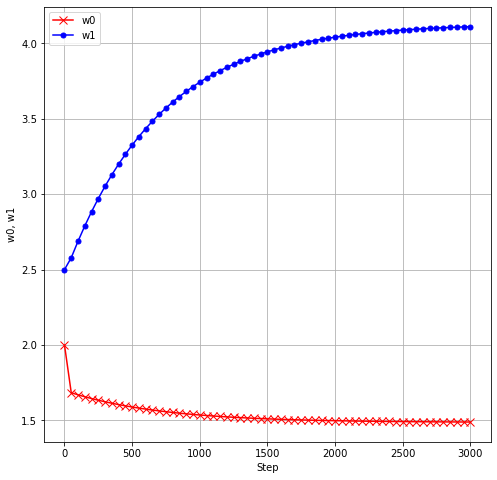

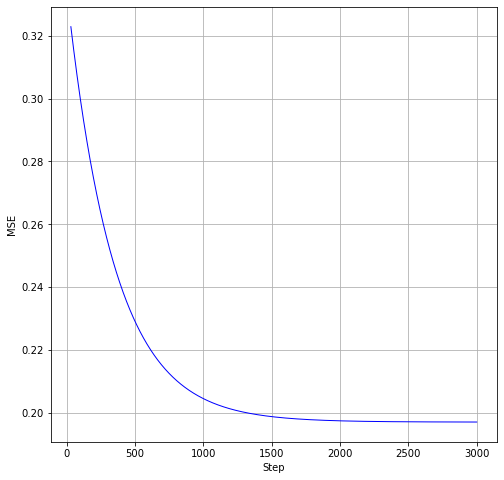

In [6]:
# Gradient Descent
step = [0]
w0_SGD = [2]
w1_SGD = [2.5]
alpha = 0.015

# 3000 Step에 대한 SGD Parameter 계산 값 저장
for i in range(0,3000): 
    step.append(i+1)
    w0_SGD.append(w0_SGD[i]-alpha*(2/len(input_x))*(sum(input_x*(w0_SGD[i]*input_x + w1_SGD[i] - output_y))))
    w1_SGD.append(w1_SGD[i]-alpha*(2/len(input_x))*(sum((w0_SGD[i]*input_x + w1_SGD[i] - output_y))))

# Step에 따른 Parameter 변화 그래프
plt.figure(6, figsize=(8,8))
plt.plot(step[::50], w0_SGD[::50], 'r', marker='x', markersize=8, label = 'w0') # 50개마다 마커를 찍도록 슬라이싱 해줌
plt.plot(step[::50], w1_SGD[::50], 'b', marker='o', markersize=5, label = 'w1')
plt.xlabel("Step")
plt.ylabel("w0, w1")
plt.legend()
plt.grid()

# Step에 따른 MSE 계산
mse_SGD = []
for i in range(0,3000):
    y_hat3 = w0_SGD[i]*input_x + w1_SGD[i]
    mse_SGD.append(sum((output_y - y_hat3)**2) / len(output_y))
    
plt.figure(7, figsize=(8,8))
plt.plot(step[30:3000], mse_SGD[30:3000], 'b', linewidth=1)
plt.xlabel("Step")
plt.ylabel("MSE")
plt.grid()